In [64]:
import import_ipynb
from imutils import paths
import matplotlib.pyplot as plt
from skimage import feature
from skimage.feature import hog
from sklearn.model_selection import train_test_split
import keras
import numpy as np
import cv2
import os
import glob

In [65]:
# Loading clean faces dataset
def chargerFaces(inputPath):
    imagePaths = list(paths.list_images(inputPath))
    names = [p.split(os.path.sep)[-1] for p in imagePaths]
    (names , counts) = np.unique(names , return_counts = True)
    names = names.tolist()

    faces = []
    labels = []
    
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        name = imagePath.split(os.path.sep)[-1]
        
        faces.append(image)
        labels.append(name.split(" ")[0])
    
    faces = np.array(faces)
    labels = np.array(labels)
    
    return (faces , labels)   

In [66]:
faces, labels = chargerFaces('FacesDB')

In [67]:
print(type(faces))
print(faces.shape)
print(len(faces))
print(faces[0].shape)

<class 'numpy.ndarray'>
(209, 100, 100, 3)
209
(100, 100, 3)


Aguerd


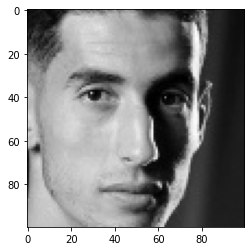

In [68]:
plt.imshow(faces[0], cmap='gray')
print(labels[0])

In [69]:
labels = np.unique(labels, return_inverse=True)[1]
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [70]:
# Convert faces into grayscale
def convertToGray(images):
    faces = []
    for i in range(len(images)):
        img = cv2.cvtColor(images[i] , cv2.COLOR_BGR2GRAY)
        faces.append(img)
    faces = np.array(faces)
    return faces      

In [71]:
faces = convertToGray(faces)

In [72]:
def extractHOG(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, channel_axis= None)
    return hog_image

In [73]:
def extractAllHOG(images):
    listHOG = []
    for i in range(len(images)):
        hogImg = extractHOG(images[i])
        listHOG.append(hogImg)
    listHOG = np.array(listHOG)
    return listHOG

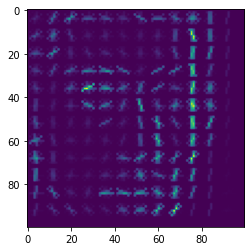

In [74]:
hogImg = extractHOG(faces[0])
plt.imshow(hogImg)

In [75]:
HogFaces = extractAllHOG(faces)

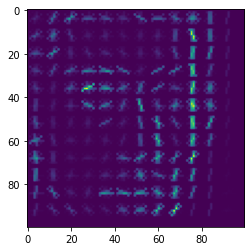

In [76]:
plt.imshow(HogFaces[0])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(HogFaces, labels, test_size=0.20, random_state=100, shuffle=True)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

167
42
167
42


In [78]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

In [79]:
x_train_flattened = X_train.reshape(len(X_train), 100*100)
x_test_flattened = X_test.reshape(len(X_test), 100*100)

In [80]:
model=keras.Sequential([
    keras.layers.Dense(120,input_shape=(10000,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=250)

Epoch 1/250
6/6 [==============================] - 1s 13ms/step - loss: 2.1634 - accuracy: 0.2036
Epoch 2/250
6/6 [==============================] - 0s 14ms/step - loss: 1.9927 - accuracy: 0.3353
Epoch 3/250
6/6 [==============================] - 0s 14ms/step - loss: 1.9199 - accuracy: 0.3353
Epoch 4/250
6/6 [==============================] - 0s 14ms/step - loss: 1.8577 - accuracy: 0.3713
Epoch 5/250
6/6 [==============================] - 0s 13ms/step - loss: 1.8125 - accuracy: 0.3653
Epoch 6/250
6/6 [==============================] - 0s 13ms/step - loss: 1.7590 - accuracy: 0.4671
Epoch 7/250
6/6 [==============================] - 0s 13ms/step - loss: 1.7086 - accuracy: 0.5210
Epoch 8/250
6/6 [==============================] - 0s 13ms/step - loss: 1.6636 - accuracy: 0.4910
Epoch 9/250
6/6 [==============================] - 0s 13ms/step - loss: 1.6143 - accuracy: 0.5629
Epoch 10/250
6/6 [==============================] - 0s 14ms/step - loss: 1.5797 - accuracy: 0.6287
Epoch 11/250
6/6 [=

6/6 [==============================] - 0s 14ms/step - loss: 0.1492 - accuracy: 1.0000
Epoch 84/250
6/6 [==============================] - 0s 15ms/step - loss: 0.1453 - accuracy: 1.0000
Epoch 85/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1406 - accuracy: 1.0000
Epoch 86/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1369 - accuracy: 1.0000
Epoch 87/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1338 - accuracy: 1.0000
Epoch 88/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1302 - accuracy: 1.0000
Epoch 89/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1264 - accuracy: 1.0000
Epoch 90/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1233 - accuracy: 1.0000
Epoch 91/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1202 - accuracy: 1.0000
Epoch 92/250
6/6 [==============================] - 0s 14ms/step - loss: 0.1171 - accuracy: 1.0000
Epoch 93/250
6/6 [=====

6/6 [==============================] - 0s 15ms/step - loss: 0.0305 - accuracy: 1.0000
Epoch 166/250
6/6 [==============================] - 0s 14ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 167/250
6/6 [==============================] - 0s 15ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 168/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 169/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 170/250
6/6 [==============================] - 0s 14ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 171/250
6/6 [==============================] - 0s 14ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 172/250
6/6 [==============================] - 0s 15ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 173/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 174/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 175/250


6/6 [==============================] - 0s 14ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 248/250
6/6 [==============================] - 0s 15ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 249/250
6/6 [==============================] - 0s 17ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 250/250
6/6 [==============================] - 0s 16ms/step - loss: 0.0119 - accuracy: 1.0000


In [63]:
model.evaluate(x_test_flattened,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.1333 - accuracy: 0.6429


[1.1332744359970093, 0.6428571343421936]